In [53]:
import sys
!{sys.executable} -m pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Conectandose con spotify
cid = '6ddbb8e0df0846349dc7b3b6a2649a9e'
secret = 'fdc68d336d984e288c63ee90530e2745'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
#Searching for a song and obtaining the data
data = pd.read_csv("/content/drive/MyDrive/beats.csv") 
nombreGrupo="31 Minutos"
nombreCancion="Arwrarwrirwrarwro - Bombi"
query = 'artist: '+nombreGrupo+' track: '+nombreCancion
results = sp.search(q=query, type='track')
trackID=results['tracks']['items'][0]["uri"]
querySong=pd.DataFrame(sp.audio_features(trackID))
querySong

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.642,0.893,0,-1.717,1,0.0894,0.408,0,0.397,0.821,110.028,audio_features,52sBVHcmAvQ2ng79ZImC1q,spotify:track:52sBVHcmAvQ2ng79ZImC1q,https://api.spotify.com/v1/tracks/52sBVHcmAvQ2...,https://api.spotify.com/v1/audio-analysis/52sB...,149359,4


In [77]:
querySong =querySong[['tempo','speechiness','acousticness','instrumentalness','danceability','loudness','valence','time_signature','duration_ms','id']]

append_query = querySong[['tempo','speechiness','acousticness','instrumentalness','danceability','loudness','valence','time_signature','duration_ms']]
append_query["track_id"] = querySong["id"][0]

In [78]:
append_query

,tempo,speechiness,acousticness,instrumentalness,danceability,loudness,valence,time_signature,duration_ms,track_id
0,110.028,0.0894,0.408,0,0.642,-1.717,0.821,4,149359,52sBVHcmAvQ2ng79ZImC1q


In [79]:
data = data[['tempo','speechiness','acousticness','instrumentalness','danceability','loudness','valence','time_signature','duration_ms','track_id']]

In [80]:
DataNueva = pd.concat([data,append_query])

DataNueva= DataNueva.reset_index(drop=True)

In [81]:
ids = DataNueva["track_id"]
DataNueva = DataNueva[['tempo','speechiness','acousticness','instrumentalness','danceability','loudness','valence','time_signature','duration_ms']]
data_sin_modificar =DataNueva.copy()

In [82]:
import numpy as np
import plotnine as ptn
from plotnine import *

In [83]:
from sklearn.cluster import KMeans

In [36]:
sse = [] #Variable para guardar el within cluster distance
numK = 20
for k in range(1, numK): #número de cluster a probar
    #Creando el modelo, entrenandolo y obteniendo el valor del within cluster distance
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(DataNueva)
    sse.append(kmeans.inertia_)
#graficando

print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse


[1.3969498427082208e+16, 6128568798120708.0, 3823609884640949.0, 2538453206600197.5, 1747022147108558.5, 1158166032124876.5, 840258057169023.0, 653716361866217.2, 523097735588169.6, 432499582290113.1, 359054740080387.4, 304351365021302.4, 262109496482867.75, 220485394369001.06, 191283280266067.5, 169013662186656.88, 149818176111477.75, 134382295193565.34, 121710797843160.44]


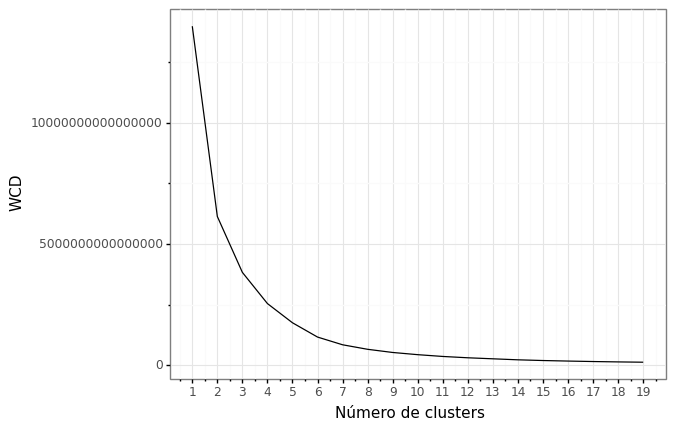

<ggplot: (8774359073109)>

In [37]:
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK))
  )

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
DataNueva = scaler.fit_transform(DataNueva) #estandarización los datos (media 0, varianza 1)

In [85]:
from sklearn.cluster import KMeans
#K-means es una clase con múltiples parámetros, atributos y funciones.
#Para aplicar k-means es necesario crear el objeto y luego aplicarto

#Creando un objeto de k-means con las condiciones iniciales
km = KMeans(n_clusters=7)
print(km)
#El objeto ha sido creado

#Entrenando el modelo con los datos de iris
km=km.fit(DataNueva)
print(km)

KMeans(n_clusters=7)
KMeans(n_clusters=7)


In [56]:
#El modelo ya ha sido entrenado, veamos los resultados
print(km.cluster_centers_) #Mostrando los centros de los clusters

print(km.inertia_) #Within cluster distance

print(km.labels_) #Etiquetas

print(km.n_iter_) #Número de iteraciones del algoritmo

[[ 1.05118685e+02  7.53224929e-02  8.23472753e-01  6.42124281e-01
   3.76290899e-01 -2.24716774e+01  3.71959316e-01  3.61736967e+00
   8.82783618e+04]
 [ 1.09113720e+02  5.19435536e-02  7.49997757e-01  5.92877814e-01
   3.45996646e-01 -1.88450268e+01  2.30611380e-01  3.78248026e+00
   4.57667655e+05]
 [ 1.12809548e+02  6.05310016e-02  5.54321644e-01  3.74437737e-01
   4.27165110e-01 -1.49098412e+01  3.43568742e-01  3.80765422e+00
   2.93296320e+05]
 [ 1.04102347e+02  4.60547444e-02  8.76042850e-01  6.98192349e-01
   2.73740044e-01 -2.04864759e+01  1.46093444e-01  3.79987457e+00
   7.02455086e+05]
 [ 1.00804848e+02  5.28936440e-02  8.69881249e-01  6.82876941e-01
   2.48714624e-01 -1.96765074e+01  1.13894587e-01  3.82386211e+00
   1.15374260e+06]
 [ 1.30121348e+02  6.73943820e-02  1.63996090e-01  5.60291067e-01
   5.00575281e-01 -1.04238764e+01  2.31051685e-01  4.01123596e+00
   3.93966596e+06]
 [ 1.10020642e+02  7.43283942e-02  6.43257770e-01  4.25501820e-01
   4.07957857e-01 -1.7374633

In [86]:
DataNueva = pd.DataFrame(DataNueva,columns=['tempo','speechiness','acousticness','instrumentalness','danceability','loudness','valence','time_signature','duration_ms'])

In [87]:
tempDF=pd.DataFrame(DataNueva,columns=list(DataNueva.columns))

etiquetas =km.labels_
etiquetas

array([6, 6, 5, ..., 6, 6, 6], dtype=int32)

In [88]:
DataNueva

,tempo,speechiness,acousticness,instrumentalness,danceability,loudness,valence,time_signature,duration_ms
0,-0.539508,0.267378,-1.802400,-1.223143,1.444578,1.812540,1.620764,0.379251,0.672844
1,-0.561783,1.859239,-1.761789,-1.223143,2.284396,1.160245,1.299970,0.379251,0.067455
2,-0.660202,4.312340,-1.585809,-1.221398,0.855615,1.084553,-0.256610,0.379251,0.061721
3,-0.746457,1.625610,-1.749335,-1.222887,2.442544,1.587084,1.011985,0.379251,0.373130
4,-0.137681,0.574281,-1.866187,-1.049364,2.524344,1.668216,1.598892,0.379251,0.067308
...,...,...,...,...,...,...,...,...,...
447618,-0.357773,-0.433508,-0.762761,-1.180363,1.542739,0.792316,1.850424,0.379251,-0.121158
447619,1.259427,-0.159525,-1.385462,0.398636,0.408439,0.612692,1.577019,-1.013596,0.287167
447620,-0.764340,-0.097932,-0.418922,-0.667243,1.199177,0.842662,1.445786,0.379251,0.118933
447621,-0.106844,-0.367667,-1.602053,-0.993774,1.330057,0.873564,0.917204,0.379251,-0.165311


In [89]:
data_sin_modificar = data_sin_modificar.reset_index(drop=True)

In [90]:
ids

0         6ayeqYtOtwVhqVB6k6MKoh
1         1UDsnzBp8gUCFsrzUDlZI9
2         3bKs15o7F9VP6GBExCbb6H
3         4L0iAst3yLonw8aGxTRCvb
4         66men3J5qFERvIY06M5hQ9
                   ...          
447618    7mdPXhJBfxJBonEmqZvm9t
447619    23dC4zCpB1bnLzBxAXDLD7
447620    7AX7qVqFljHOJC3FIQ8a6t
447621    7w83TSpDeFsL8dV9pAHWn6
447622    52sBVHcmAvQ2ng79ZImC1q
Name: track_id, Length: 447623, dtype: object

In [91]:
data_sin_modificar["cluster"] = etiquetas
data_sin_modificar["track_id"] = ids

In [72]:
data_sin_modificar

,tempo,speechiness,acousticness,instrumentalness,danceability,loudness,valence,time_signature,duration_ms
0,91.661,0.0941,0.03300,0.000000,0.656,-3.011,0.782,4,347973
1,90.956,0.2440,0.04800,0.000000,0.810,-8.647,0.694,4,241026
2,87.841,0.4750,0.11300,0.000722,0.548,-9.301,0.267,4,240013
3,85.111,0.2220,0.05260,0.000106,0.839,-4.959,0.615,4,295026
4,104.379,0.1230,0.00944,0.071900,0.854,-4.258,0.776,4,241000
...,...,...,...,...,...,...,...,...,...
447618,97.413,0.0281,0.41700,0.017700,0.674,-11.826,0.845,4,207706
447619,148.598,0.0539,0.18700,0.671000,0.466,-13.378,0.770,3,279840
447620,84.545,0.0597,0.54400,0.230000,0.611,-11.391,0.734,4,250120
447621,105.355,0.0343,0.10700,0.094900,0.635,-11.124,0.589,4,199906


In [92]:
cancion = data_sin_modificar.iloc[-1,:]

cluster_cancion= data_sin_modificar.loc[data_sin_modificar['cluster'] == cancion["cluster"]]
cluster_cancion

,tempo,speechiness,acousticness,instrumentalness,danceability,loudness,valence,time_signature,duration_ms,cluster,track_id
0,91.661,0.0941,0.03300,0.000000,0.656,-3.011,0.782,4,347973,6,6ayeqYtOtwVhqVB6k6MKoh
1,90.956,0.2440,0.04800,0.000000,0.810,-8.647,0.694,4,241026,6,1UDsnzBp8gUCFsrzUDlZI9
3,85.111,0.2220,0.05260,0.000106,0.839,-4.959,0.615,4,295026,6,4L0iAst3yLonw8aGxTRCvb
4,104.379,0.1230,0.00944,0.071900,0.854,-4.258,0.776,4,241000,6,66men3J5qFERvIY06M5hQ9
5,85.862,0.1360,0.00522,0.000000,0.697,-9.604,0.387,4,224026,6,7GVCAVH7SZnjrzHI1FmfeA
...,...,...,...,...,...,...,...,...,...,...,...
447618,97.413,0.0281,0.41700,0.017700,0.674,-11.826,0.845,4,207706,6,7mdPXhJBfxJBonEmqZvm9t
447619,148.598,0.0539,0.18700,0.671000,0.466,-13.378,0.770,3,279840,6,23dC4zCpB1bnLzBxAXDLD7
447620,84.545,0.0597,0.54400,0.230000,0.611,-11.391,0.734,4,250120,6,7AX7qVqFljHOJC3FIQ8a6t
447621,105.355,0.0343,0.10700,0.094900,0.635,-11.124,0.589,4,199906,6,7w83TSpDeFsL8dV9pAHWn6


In [93]:
df_distancias_calcular = cluster_cancion.iloc[:-1,:-2]
cancion_calcular = cluster_cancion.iloc[-1,:-2]
df_distancias_calcular

,tempo,speechiness,acousticness,instrumentalness,danceability,loudness,valence,time_signature,duration_ms
0,91.661,0.0941,0.03300,0.000000,0.656,-3.011,0.782,4,347973
1,90.956,0.2440,0.04800,0.000000,0.810,-8.647,0.694,4,241026
3,85.111,0.2220,0.05260,0.000106,0.839,-4.959,0.615,4,295026
4,104.379,0.1230,0.00944,0.071900,0.854,-4.258,0.776,4,241000
5,85.862,0.1360,0.00522,0.000000,0.697,-9.604,0.387,4,224026
...,...,...,...,...,...,...,...,...,...
447617,147.464,0.0507,0.56800,0.045900,0.673,-10.971,0.965,4,141240
447618,97.413,0.0281,0.41700,0.017700,0.674,-11.826,0.845,4,207706
447619,148.598,0.0539,0.18700,0.671000,0.466,-13.378,0.770,3,279840
447620,84.545,0.0597,0.54400,0.230000,0.611,-11.391,0.734,4,250120


In [94]:
df_distancias_calcular= df_distancias_calcular.reset_index(drop=True)

In [95]:
distancias =  []

for i in df_distancias_calcular.index: 
      fila = df_distancias_calcular.loc[i,:]
      distance = np.linalg.norm(cancion_calcular-fila)
      distancias.append(distance)
      print(i)


Se han truncado las últimas 5000 líneas del flujo de salida.
103907
103908
103909
103910
103911
103912
103913
103914
103915
103916
103917
103918
103919
103920
103921
103922
103923
103924
103925
103926
103927
103928
103929
103930
103931
103932
103933
103934
103935
103936
103937
103938
103939
103940
103941
103942
103943
103944
103945
103946
103947
103948
103949
103950
103951
103952
103953
103954
103955
103956
103957
103958
103959
103960
103961
103962
103963
103964
103965
103966
103967
103968
103969
103970
103971
103972
103973
103974
103975
103976
103977
103978
103979
103980
103981
103982
103983
103984
103985
103986
103987
103988
103989
103990
103991
103992
103993
103994
103995
103996
103997
103998
103999
104000
104001
104002
104003
104004
104005
104006
104007
104008
104009
104010
104011
104012
104013
104014
104015
104016
104017
104018
104019
104020
104021
104022
104023
104024
104025
104026
104027
104028
104029
104030
104031
104032
104033
104034
104035
104036
104037
104038
104039
104040
1

In [96]:
canciones_para_playlist = pd.DataFrame(cluster_cancion.iloc[:-1,:]["track_id"])
canciones_para_playlist["Distancia"] = distancias
canciones_para_playlist["duration_ms"] = pd.DataFrame(cluster_cancion.iloc[:-1,:]["duration_ms"])

In [97]:
final_df = canciones_para_playlist.sort_values(by=['Distancia'], ascending=True)
final_df

,track_id,Distancia,duration_ms
500,52sBVHcmAvQ2ng79ZImC1q,0.000000,149359
194306,65GNh5HvdoL1GuexpADyPp,17.226704,149350
195539,2eH3wv9ZKaYMogt6kLcMHG,17.234610,149350
195245,1Ro6zzyPRL2iNB63lGAgfo,20.307665,149373
29721,6sbIFWyNDj9q6dRz6XMVSJ,27.308873,149346
...,...,...,...
248975,15ttjIuYO5stJR6yuIPjhu,759761.002080,909120
248916,7Dtpk5bbk5slJQQNOZ2jTo,760107.002877,909466
248971,5P8KbD2vdh9TVO2rzE1bdp,766721.000244,916080
109828,3zHW28qJB0iSByH8JSr0MT,793714.000876,943073


In [98]:
playlist_songs = []
sum_hours = 0
max_time = 1.08*10**7 # 3 hours to ms
for i in final_df.index:
  playlist_songs.append(final_df.loc[i,"track_id"])
  sum_hours += final_df.loc[i,"duration_ms"]
  if sum_hours>=max_time:
    break

In [99]:
len(playlist_songs)

73

In [100]:
playlist_songs

['52sBVHcmAvQ2ng79ZImC1q',
 '65GNh5HvdoL1GuexpADyPp',
 '2eH3wv9ZKaYMogt6kLcMHG',
 '1Ro6zzyPRL2iNB63lGAgfo',
 '6sbIFWyNDj9q6dRz6XMVSJ',
 '4WBmkMJyWubRXRLYk8t9SI',
 '6jkdt7GDct9kwhps4KGJr8',
 '2MucBx89YDn23o0Grjqduh',
 '550mLxfVD8kBgooKKvHC3d',
 '13MMYF9nMVDGdFFL080QHy',
 '6s46DfYdbnlkRBFgJn5Q7B',
 '7mB6BFVD1WQccVTIan9aWw',
 '0A0iJ8S2YskwUruZTHEAWu',
 '2E0WHkWYeMuDAor5hOVG4R',
 '3KtHbjC7qDZxEvNAoJ7e1J',
 '1CXQgNZOYUjEH9d62Y3pRw',
 '1nSTl7Q90uQQjx9sWZW9LV',
 '79myzhppux8TN69wGJ3EVK',
 '1GKxcsjUMfUnlOQ60X3gjm',
 '4rvo20Lf7B2YdGAIa5eLwv',
 '5VCoXlVT7w3Am5WHnPik1Q',
 '5wKPgIEKZU6ex3AHyAYZCD',
 '3DX7qFV5xSaxuONSfIsUjg',
 '1xC3g1XRt63TPxlghfNJGV',
 '7ixHZ5EUkPYCKScXKGaYoS',
 '1MVE2JtytfmG2k20etjCGl',
 '0r3DBQuGHQdN2dkfCpob9W',
 '0EJ3N6BhFDrUc26xBEpztv',
 '6SzMtA6UOKDvdUC5dGEqyj',
 '7sUlVmU4HXOPJKHIcFDCGX',
 '717XgYKOW5D83Yh2RqTzBu',
 '5EZly2tIFucq5Nq0mIyZWT',
 '1npKUKBTwvUgEyUxKSt80b',
 '11ibRP3KxQFIsMiuG31tHa',
 '3NjJnc0FgwGEzRGv3NjDDE',
 '38U1XnzXWKb9lMS8inL3Va',
 '40sl0jG01g4FZkCrBzQhZX',
 